In [32]:
from itertools import zip_longest
from copy import deepcopy
from random import randrange

# from scipy.signal import convolve

class LInt:
    '''Positive long integers'''
    def __init__(self, string_repr: str | None = None, digits: list[int] | None = None, digits_reversed: list[int] | None = None, base: int = 10) -> None:
        '''
        Initialize a long integer by either one of the following:
            string_repr: literal string of the digits (ex.: '143')
            digits: a list of the digits (ex.: [1, 4, 3])
            digits_reversed: a reversed list of the digits (ex.: [3, 4, 1])
        '''
        self.base = base
        if string_repr is not None:
            self.d = list(map(int, reversed(string_repr)))
        elif digits is not None:
            self.d = digits[::-1]
        elif digits_reversed is not None:
            self.d = digits_reversed
        else:
            self.d = [0]
        self.strip()
    
    def strip(self):
        '''Remove preceeding zeros.'''
        while not self.d[-1] and len(self.d) > 1:
            self.d.pop()
    
    def copy(self) -> 'LInt':
        return deepcopy(self)
    
    def as_int(self) -> int:
        return int(str(self))
    
    def __eq__(self, other: 'LInt') -> bool:
        return self.d == other.d
    
    def __str__(self) -> str:
        return ''.join(map(str, reversed(self.d)))
    
    def __repr__(self) -> str:
        extra = f', base={self.base}' if self.base != 10 else ''
        return f'LInt({self.__str__()}{extra})'
    
    def __hash__(self) -> int:
        return hash(str(self))
    
    def __add__(self, other: 'LInt') -> 'LInt':
        if self.base != other.base: raise ValueError(f'Numbers {self} and {other} have different bases: {self.base} and {other.base}')
        res = [0] * (max(len(self.d), len(other.d)) + 1)
        carry = 0
        for i, (d1, d2) in enumerate(zip_longest(self.d, other.d, fillvalue=0)):
            carry, rem = divmod(d1 + d2 + carry, self.base)
            res[i] = rem
        if carry: res[-1] = carry
        return LInt(digits_reversed=res, base=self.base)
    
    def _mul(self, first: 'LInt', second: 'LInt'):
        res = [0] * (len(first.d) + len(second.d))
        for i, na in enumerate(first.d):
            for j, nb in enumerate(second.d):
                carry, rem = divmod(na * nb, self.base)
                res[i+j] += rem; res[i+j+1] += carry
        for i in range(len(res)-1):
            carry, rem = divmod(res[i], self.base)
            res[i] = rem; res[i+1] += carry
        return LInt(digits_reversed=res, base=self.base)
    
    # @staticmethod
    # def _mul_convolution(first, second):
    #     result = convolve(first.d, second.d)
    #     carry = 0
    #     for i in range(len(result)-1):
    #         carry, rem = divmod(result[i] + carry, 10)
    #         result[i] = rem
    #     return LInt(digits_reversed=result)
    
    def __mul__(self, other: 'LInt') -> 'LInt':
        if self.base != other.base: raise ValueError(f'Numbers {self} and {other} have different bases: {self.base} and {other.base}')
        return self._mul(self, other)
        # return self._mul_convolution(self, other)

    def __pow__(self, other: 'LInt') -> 'LInt':
        '''Raises (self) to the power of (other) and
        returns the result.'''
        if self.base != other.base: raise ValueError(f'Numbers {self} and {other} have different bases: {self.base} and {other.base}')
        if other.d == [0]: return LInt('1', base=self.base)
        if other.d == [1]: return self.copy()
        res = self.copy(); count = other.copy()
        while count.d != [1]:
            res = res * self
            count.sub_one()
        return res
    
    def __mod__(self, other: 'LInt') -> 'LInt':
        if self.base != other.base: raise ValueError(f'Numbers {self} and {other} have different bases: {self.base} and {other.base}')
        raise NotImplementedError()
    
    def sub_one(self) -> None:
        '''Decreases a number by 1.
        Raises ValueError if the value of self is 0.'''
        if self.d == [0]:
            raise ValueError('Cannot subtract 1 from 0')
        for i in range(len(self.d)):
            if self.d[i] > 0:
                self.d[i] -= 1
                break
            self.d[i] = self.base - 1
        self.strip()

    def factorial(self) -> 'LInt':
        '''Find and return a factorial of self'''
        if self.d == [0] or self.d == [1]: return LInt('1', base=self.base)
        to_mult = self.copy()
        res = LInt('1', base=self.base) # store result here
        while to_mult.d != [1]:
            res = res * to_mult
            to_mult.sub_one()
        return res
    
    def digitsum(self) -> 'LInt':
        '''Find and return a sum of digits of self'''
        res = LInt(base=self.base)
        for d in self.d:
            res = res + LInt([d], base=self.base)
        return res

    def is_palindrome(self) -> bool:
        return self.d == self.d[::-1]

    @classmethod
    def random(cls, n_digits: int, base: int = 10):
        return LInt(digits=[randrange(base) for _ in range(n_digits)], base=base)

In [29]:
# base 10
n5123 = LInt('5123')
n132 = LInt('132')
n1011 = LInt('1011')
zero = LInt('0')
one = LInt('1')
two = LInt('2')
nine = LInt('9')
ten = LInt('10')

# base 2
five_2 = LInt('101', base=2)
n2921_2 = LInt('101101101001', base=2)

In [30]:
five_2.factorial().digitsum()

LInt(100, base=2))

In [31]:
n5123 * n1011

LInt(5179353)

In [56]:
two_to_1011 = two ** n1011

In [57]:
print(two_to_1011)
print('digitsum: ', two_to_1011.digitsum())

21944496275174754733023745004748837080297570543729328280448007953824789527038691788660702798145451174453138901351488446979832735450978591612896414872982681198457994802840025058142360791167736098566050165049439180766375815715632675961171034001565824849041810386302038359368560295224574744242597208206082048
digitsum:  1376


In [58]:
n1011_to_1011 = n1011 ** n1011

In [59]:
print(n1011_to_1011)
print('digitsum: ', n1011_to_1011.digitsum())

6359431628559206955290117642034522734168052929020346313689045110683237682469314437428644171701692146255696313621712161541825181230330883167023773668020656867301409935041894503432087293297281369144945740326443953626229748177309432423499362761980014642535824247938664480540224819062145667218066349880159561874504814081580971082127866437202270284860068729285677508710918187755988329571896117558452772331177343594370982403269203239615974832787578245463715521574119335406327139794013890447064521576188943642438262581385528666772737122561368192448490422539152288314307052395499304372558399409769947984383484226425780158877920945435455894504910156481953651224848169923059281177021661023785912756325708566807190814949706988207735146655115975997270680570787554893934620907871202010896548894656571412660553051781787850687442575267898825111889755277051970000564947297088173235266478732011228660622169771302603453700880505648231534881812373109165180500683369354830470171519731911982998365055683530965572898499217

In [60]:
n5123_factorial = n5123.factorial()

In [61]:
print(n5123_factorial)
print('digitsum:', n5123_factorial.digitsum())
print('length:', len(n5123_factorial.d))

1805109453739921755920678549389026927570254211429915572655694289272238947409363060002386870398575971049087263480234057432804066841543472315907396655080013811016124869005399907495531436234009669142984579789794568828043076316985271430519349199495843031175573244919512023343239040173016398689771580653185159400245108758447978788274191353568069629443848383720736915314816721430917920387695144121132637753595577354776205181346886861068608956561106233712460042849450407763981224468482827376776013814381731544920482356188805249897036876605184282005162648444345833079921693297639904379517677434295091565849346477309847833693367176786857241997670569793277782583620026568963368818331770853234916697757410294723204060662489023136483696552383674106537895895965150533267565988433460240143461540838515171190043649870571142733568394407197528294840746301841226824308025570191962508580815182660932471739703927162432076745344040789915135429279556591088788991914990636532576479067547113387275523631281546616634970864836

## Lychrel numbers

In [114]:
def lychrel_iterations(num: LInt) -> int:
    res = 0
    num_copy = num.copy()
    while not num_copy.is_palindrome():
        # adding a palindrome
        num_copy = num_copy + LInt(digits=num_copy.d)
        res += 1
        if res > 500:
            return -1
    return res

In [115]:
result: dict[LInt, int] = {}
this_num = LInt('19')
for i in range(100_000):
    result[this_num] = lychrel_iterations(this_num)
    this_num += one

In [134]:
import matplotlib.pyplot as plt
import numpy as np
def list_derivative(lst): return [n2 - n1 for n1, n2 in zip(lst[:-1], lst[1:])]

In [155]:
lychrel_candidates = [k.as_int() for k, v in result.items() if v == -1]

In [156]:
lychrel_candidates_diff = list_derivative(lychrel_candidates)
lcd_smooth = np.convolve(lychrel_candidates_diff, np.ones(100), 'valid') / 100

In [157]:
lychrel_candidates_diff_2 = list_derivative(lychrel_candidates_diff)

Text(0.5, 1.0, "$L''(n)$")

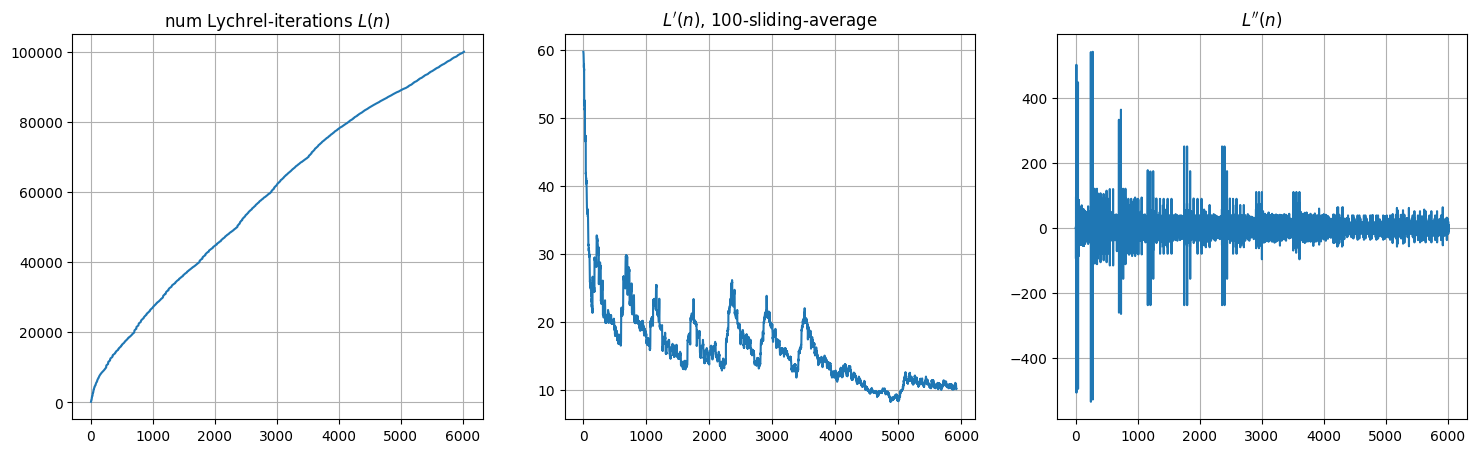

In [158]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].plot(lychrel_candidates)
axs[0].grid(); axs[0].set_title(r'num Lychrel-iterations $L(n)$')
axs[1].plot(lcd_smooth)
axs[1].grid(); axs[1].set_title(r"$L'(n)$, 100-sliding-average")
axs[2].plot(lychrel_candidates_diff_2)
axs[2].grid(); axs[2].set_title(r"$L''(n)$")